# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Business Understanding

European banks need to strengthen their financial assets. One approach is to offer long-term deposits with low interest rates through direct marketing campaigns. At the same time, they also need to reduce their costs and turnaround time. The problem is, the public has experienced some fatigue from all these campaigns, and they are not as effective as they could be. Can we learn from the data to find out what customer attributes increase the chance of a successful depost? If so, the campaigns can be tailored to these high-probability prospects, avoiding wasted time and resources on those that are less likely to deposit.

Reference - https://github.com/jbeno/bank 

## Business Objectives and Success Criteria

- Describe Characteristics of Depositers – Identify the characteristics of prospects that end up depositing money, vs. those that don't. This will allow the banks to target the customers that are most likely to deposit.
- Create Predictive Model – Create a machine learning model that will classify prospects as either likely to deposit or not, based on their characteristics.
- Compare Performance of Classifiers – Compare the performance of the following classifiers: K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines

## Data Mining Goals and Success Criteria

The following data analysis approach will be taken to meet the business goals identified above:

- Data Cleaning: The data set will be examined and cleansed to prepare it for analysis. Missing values and outliers will be handled.
- Data Transformation/Encoding: To maximize the use of the data we have, categorical/nominal values will be encoded into a suitable numeric form. If any variables exhibit a skewed distribution, log transformation may be considered to bring them closer to normal distribution.
- Feature Engineering: In addition, there may be opportunities to engineer new features that are derived from the variables present in the dataset.
- Exploratory Data Analysis: The dataset will be explored using descriptive statistics, correlations, and by plotting charts of variable distributions and multivariate relationships.
- Model Iteration: Data will be split into training and test sets. Pipelines will be constructed to process data, select features, and train classification models. A variety of hyper-parameters will be explored to find the optimum model during cross-validation.
- Model Evaluation: Model performance will be evaluated against the test dataset. The best performing model will be selected based on it's ability to predict the test data, ensuring it was not overfitted to the training data set and can be generalized to new data.

# Data Understanding 

## Data Attributes 

### Bank client Attributes 
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### Customer contact attribute for the last contact for the current campaign 
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Others 
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

## Missing Attribute Values
There are several missing values in some categorical attributes, all coded with the "unknown" label.

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import re

In [459]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [460]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [462]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [463]:
# check for value counts 
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [464]:
# rename the columns 

df = df.rename(columns={"previous": "previous_contact"})
df = df.rename(columns={"emp.var.rate": "employment_variation_rate"})
df = df.rename(columns={"cons.price.idx": "cons_price_idx"})
df = df.rename(columns={"cons.conf.idx": "consumer_confidence_index"})
df = df.rename(columns={"nr.employed": "number_of_employees"})
df = df.rename(columns={"y": "client_subscribed_term_deposit"})

## Investigate Missing or Problematic Data

In [465]:
# null values 
df.isna().sum()

age                               0
job                               0
marital                           0
education                         0
default                           0
housing                           0
loan                              0
contact                           0
month                             0
day_of_week                       0
duration                          0
campaign                          0
pdays                             0
previous_contact                  0
poutcome                          0
employment_variation_rate         0
cons_price_idx                    0
consumer_confidence_index         0
euribor3m                         0
number_of_employees               0
client_subscribed_term_deposit    0
dtype: int64

In [466]:
df.job.value_counts()

#In this example unknown is equivalent to NaN since the information is missing 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

## Simple visualisation of the data to understand how a single feature affects the outcome

Text(0.5, 1.0, 'Histogram of Age and client subscription to term deposit')

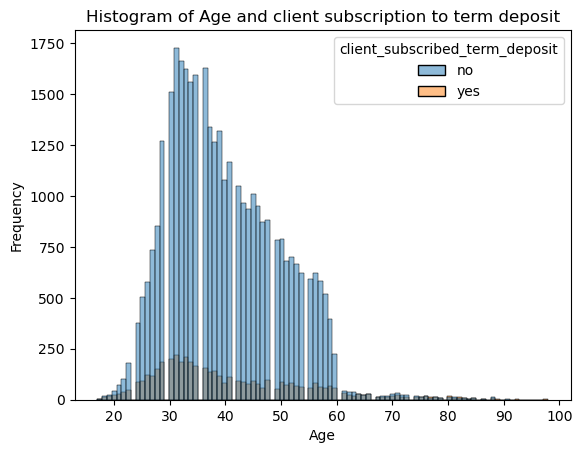

In [467]:
# using seaborn 
sns.histplot(data=df, x="age", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of Job and client subscription to term deposit')

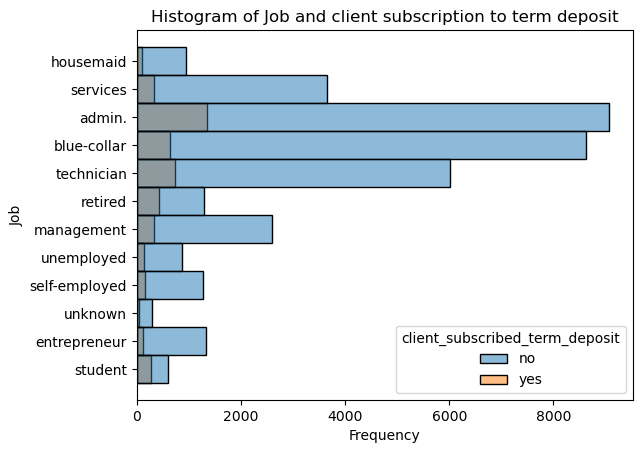

In [468]:
# using seaborn 
sns.histplot(data=df, y="job", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('Job')
plt.title('Histogram of Job and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of marital status and client subscription to term deposit')

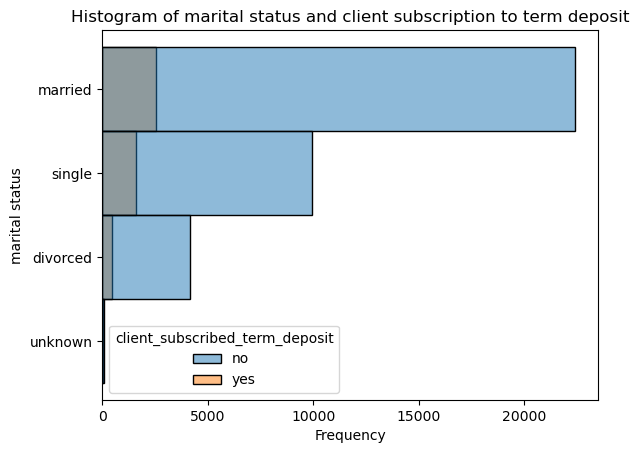

In [469]:
# using seaborn 
sns.histplot(data=df, y="marital", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('marital status')
plt.title('Histogram of marital status and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of Education and client subscription to term deposit')

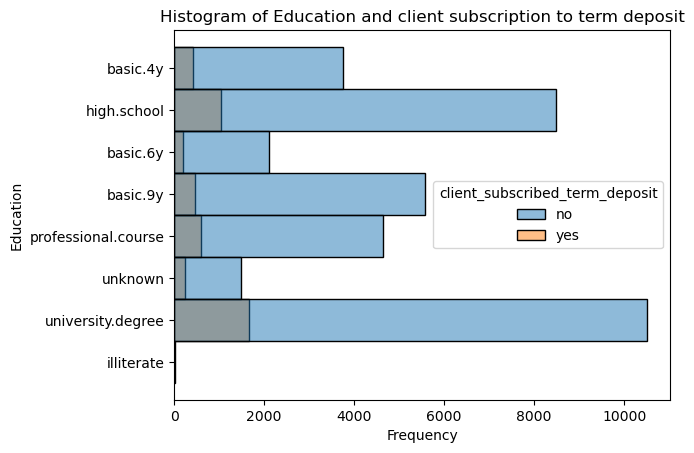

In [470]:
# using seaborn 
sns.histplot(data=df, y="education", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('Education')
plt.title('Histogram of Education and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of "has credit in default" and client subscription to term deposit')

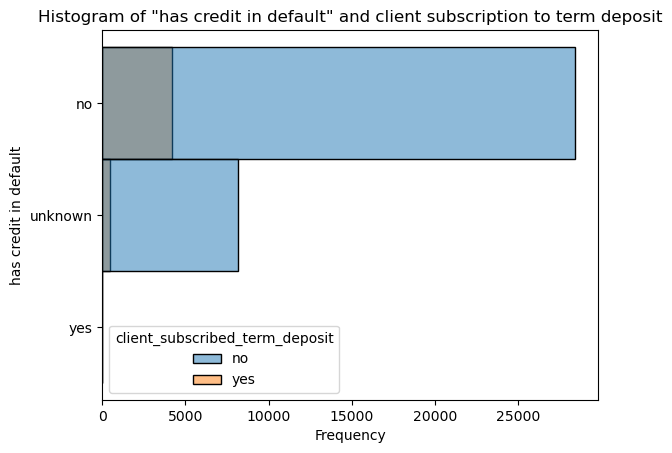

In [471]:
# using seaborn 
sns.histplot(data=df, y="default", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('has credit in default')
plt.title('Histogram of "has credit in default" and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of "has housing loan" and client subscription to term deposit')

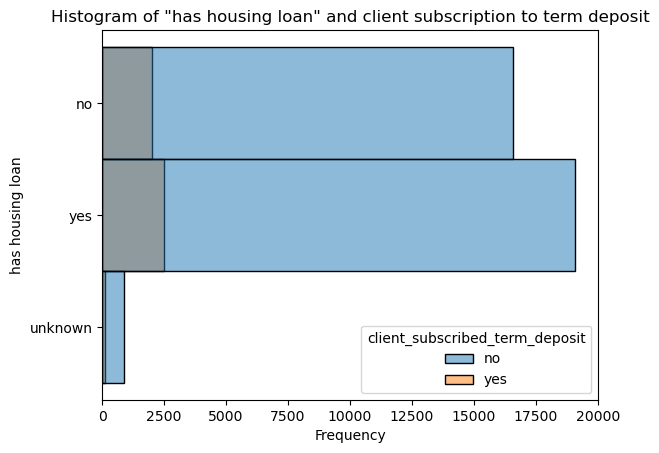

In [472]:
# using seaborn 
sns.histplot(data=df, y="housing", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('has housing loan')
plt.title('Histogram of "has housing loan" and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of "has personal loan" and client subscription to term deposit')

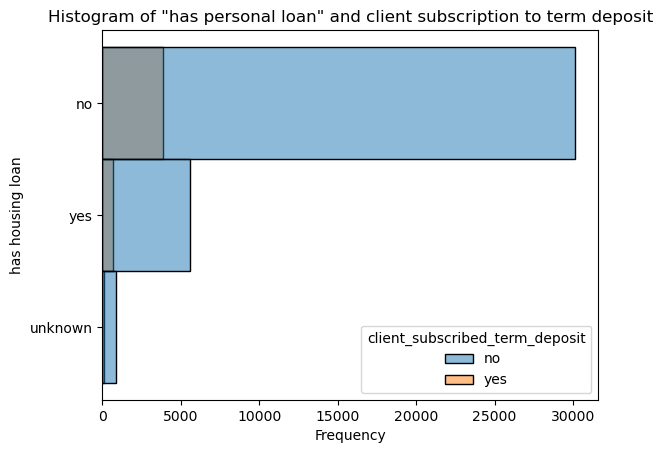

In [473]:
# using seaborn 
sns.histplot(data=df, y="loan", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('has housing loan')
plt.title('Histogram of "has personal loan" and client subscription to term deposit')

In [474]:
# Count the number of 'unknown' values in each object column
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    unknown_count = (df[col] == 'unknown').sum()
    unknown_percent = unknown_count / len(df) * 100
    print(f"{col}: {unknown_count} ({unknown_percent:.2f}%)")

job: 330 (0.80%)
marital: 80 (0.19%)
education: 1731 (4.20%)
default: 8597 (20.87%)
housing: 990 (2.40%)
loan: 990 (2.40%)
contact: 0 (0.00%)
month: 0 (0.00%)
day_of_week: 0 (0.00%)
poutcome: 0 (0.00%)
client_subscribed_term_deposit: 0 (0.00%)


## Conclusion 
- Mostly middle age is when clients are drawn towards making deposits 
- Admins, blue-collar and technicians have the highest deposits 
- Married people tend to make more deposits 
- Individuals with university degree tend to make more deposits 
- Housing loan doesn't seem to affect the outcome while default and personal loans does 

### Is there Bias in the Data 
- Some or the larger population size tends to have more positive outcomes, example 
    - university degree and high school degree has a higher positive outcome and their population size is the two largest in the dataset 
    - In marital status the number of married is more then single which could have led to more positive outcomes in the married population 

In [475]:
# bias analysis for marital staus 
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [476]:
df.groupby(by=["marital", "client_subscribed_term_deposit"]).size()

marital   client_subscribed_term_deposit
divorced  no                                 4136
          yes                                 476
married   no                                22396
          yes                                2532
single    no                                 9948
          yes                                1620
unknown   no                                   68
          yes                                  12
dtype: int64

## Bias In Data 

- 10% of married people who were contacted accepted 
- 14% of single people who were contacted accepted 

In conclusion the reason it looks like Married people are more likely to make the deposit is due to large population that was contacted 

### Reset the Dataframe 

In [477]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

## Types of variables

### Explore categorical Variables

In [478]:
 # find categorical variables

categorical = [var for var in df.columns if df[var].dtype in ['object', 'category', 'string']]

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 11 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [479]:
# view the categorical variables

df[categorical].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [480]:
# check missing values in categorical variables

df[categorical].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64

In [481]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

In [482]:
# view frequency distribution of categorical variables

for var in categorical: 
    print(df[var].value_counts()/np.float(len(df)))

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64
no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64
yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64
no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: f

/var/folders/3y/h66zz12x4p9_7hpzsntxf_6m0000gn/T/ipykernel_1308/3898893723.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
/var/folders/3y/h66zz12x4p9_7hpzsntxf_6m0000gn/T/ipykernel_1308/3898893723.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(

### Explore Numerical Variables

In [483]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [484]:
# view the numerical variables

df[numerical].head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [485]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [486]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

           age  duration  campaign    pdays  previous  emp.var.rate  \
count  41188.0   41188.0   41188.0  41188.0   41188.0       41188.0   
mean      40.0     258.0       3.0    962.0       0.0           0.0   
std       10.0     259.0       3.0    187.0       0.0           2.0   
min       17.0       0.0       1.0      0.0       0.0          -3.0   
25%       32.0     102.0       1.0    999.0       0.0          -2.0   
50%       38.0     180.0       2.0    999.0       0.0           1.0   
75%       47.0     319.0       3.0    999.0       0.0           1.0   
max       98.0    4918.0      56.0    999.0       7.0           1.0   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count         41188.0        41188.0    41188.0      41188.0  
mean             94.0          -41.0        4.0       5167.0  
std               1.0            5.0        2.0         72.0  
min              92.0          -51.0        1.0       4964.0  
25%              93.0          -43.0        1

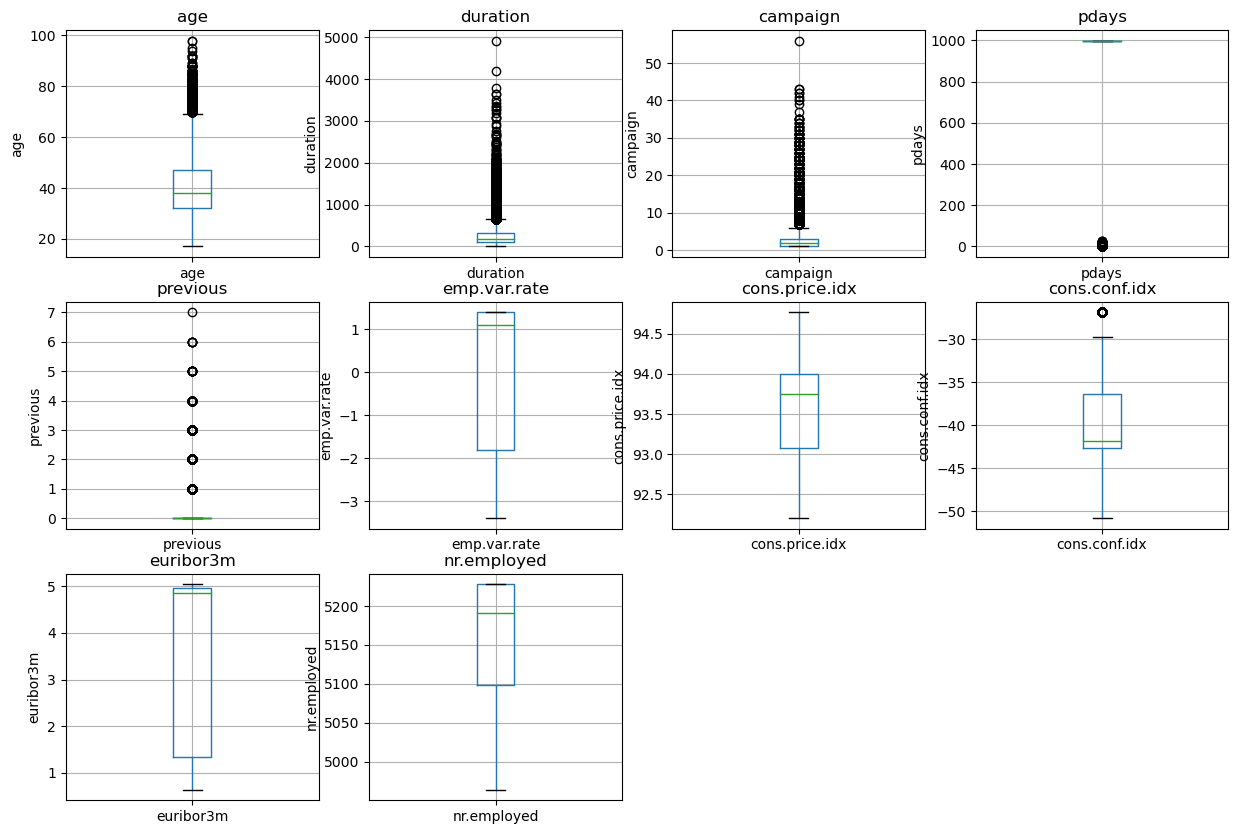

In [487]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

for idx, col in enumerate(numerical):
    plt.subplot(3, 4, idx+1)
    fig = df.boxplot(column=col)
    fig.set_title(col)
    fig.set_ylabel(col)

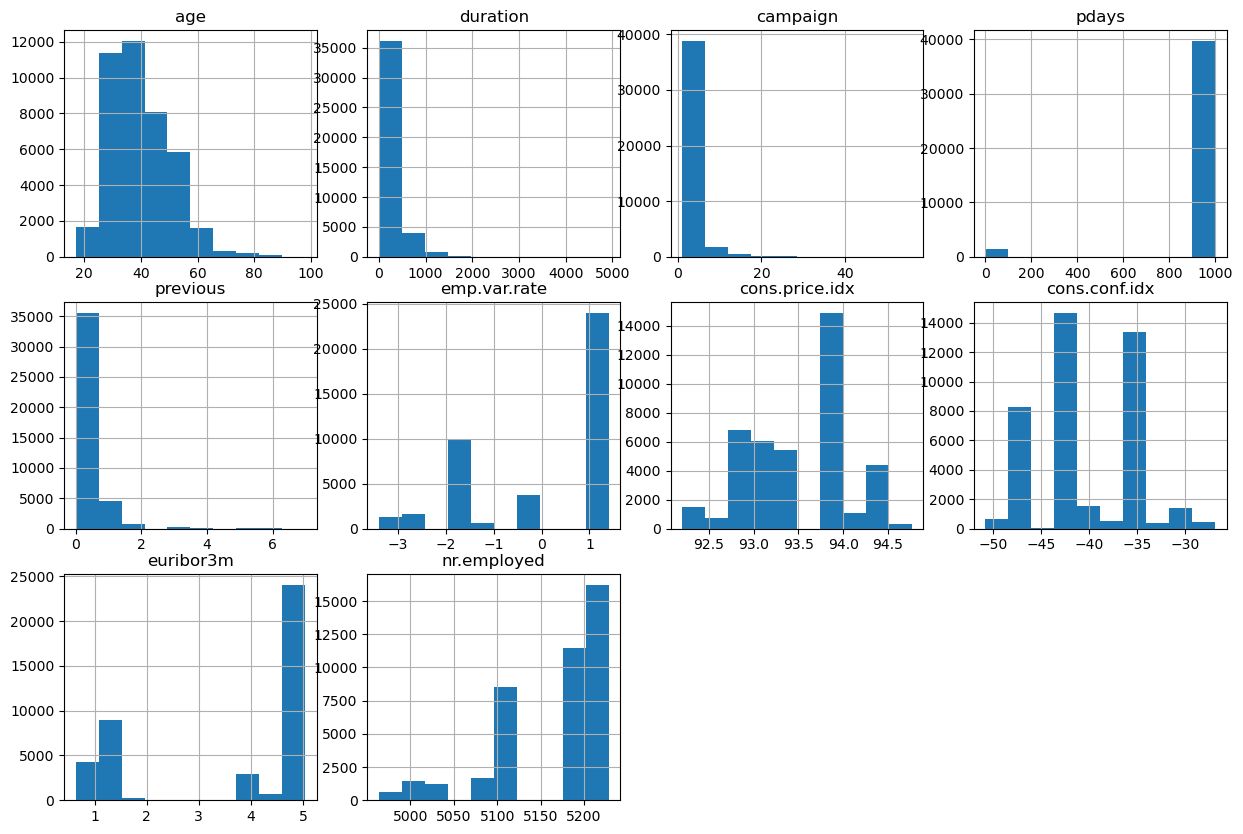

In [488]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

for idx, col in enumerate(numerical):
    plt.subplot(3, 4, idx+1)
    fig = df[col].hist(bins=10)
    fig.set_title(col)

## Engineering Features
Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

### Encoding values 

In [538]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [539]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
le = LabelEncoder()

#encode the feature columns that are non numerical 
for idx, col in enumerate(features):
    if(df[col].dtype in ['object', 'category', 'string']):
        df[col] = le.fit_transform(df[col])

# encode the outcome columns
outcome = ['y']
df['y'] = le.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [540]:
# Declare feature vector and target variable 
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
y = df['y']

## Split data into separate training and test set

In [541]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [542]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((30891, 7), (10297, 7))

In [543]:
X_train.describe()

,age,job,marital,education,default,housing,loan
count,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,40.017287,3.711081,1.174549,3.752258,0.207536,1.072545,0.328057
std,10.448075,3.590059,0.610124,2.138102,0.405709,0.984937,0.723769
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,38.000000,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000
max,98.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000


# A Baseline Model

## Classifications and K-Nearest Neighbors 

In [495]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Build a KNN training model with 5 neighbors using a subset of features 

In [496]:
knn_pipe = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier())])


params = {'knn__n_neighbors': list(range(1, 22, 2))}
knn_grid = GridSearchCV(knn_pipe, param_grid=params)
knn_grid.fit(X_train, y_train)
best_k = list(knn_grid.best_params_.values())[0]
best_accuracy = knn_grid.score(X_test, y_test)

In [497]:
print(best_accuracy)
print(best_k)

0.8874429445469554
19


In [498]:
from sklearn.neighbors import KNeighborsClassifier

neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_pipe = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier())])
    knn_pipe.fit(X_train, y_train)
    train_accuracy[i]=knn_pipe.score(X_train, y_train)
    test_accuracy[i]=knn_pipe.score(X_test, y_test)

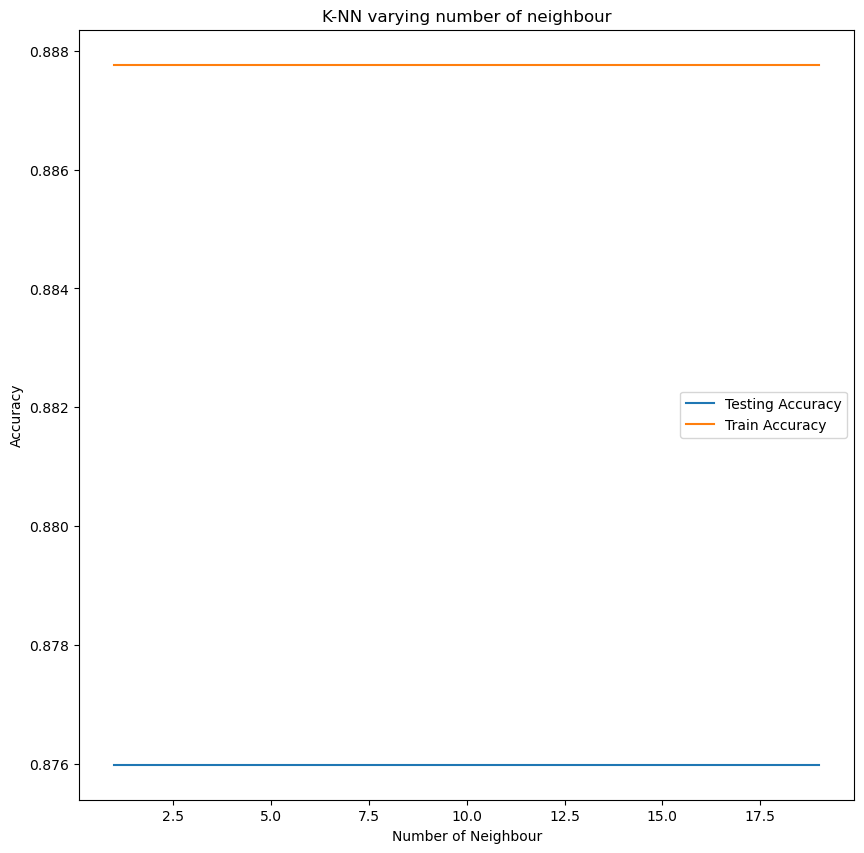

In [499]:
plt.figure(figsize=(10,10))
plt.title("K-NN varying number of neighbour")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.legend()
plt.xlabel("Number of Neighbour")
plt.ylabel("Accuracy")
plt.show()

In [500]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_train)

In [501]:
base_probs = knn.predict_proba(X_test)
pd.DataFrame(base_probs[:10], columns = ['p_no', 'p_yes'])

,p_no,p_yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.666667,0.333333
4,1.000000,0.000000
5,1.000000,0.000000
6,1.000000,0.000000
7,1.000000,0.000000
8,0.333333,0.666667
9,1.000000,0.000000


### Confusion Matrix

Reference - https://www.kaggle.com/code/jurk06/knn-classification-using-gridseachcv


<center>
    <img src = images/confusion_matrix.jpeg width = 50%/>
</center>


In [502]:
y_test_pred=knn.predict(X_test)

cfm=confusion_matrix(y_test, y_test_pred)
trueNegative=cfm[0][0]
falsePossitive=cfm[0][1]
false_negative=cfm[1][0]
truePositive=cfm[1][1]

print("Confusion Matrix", cfm)

Confusion Matrix [[8731  413]
 [1025  128]]


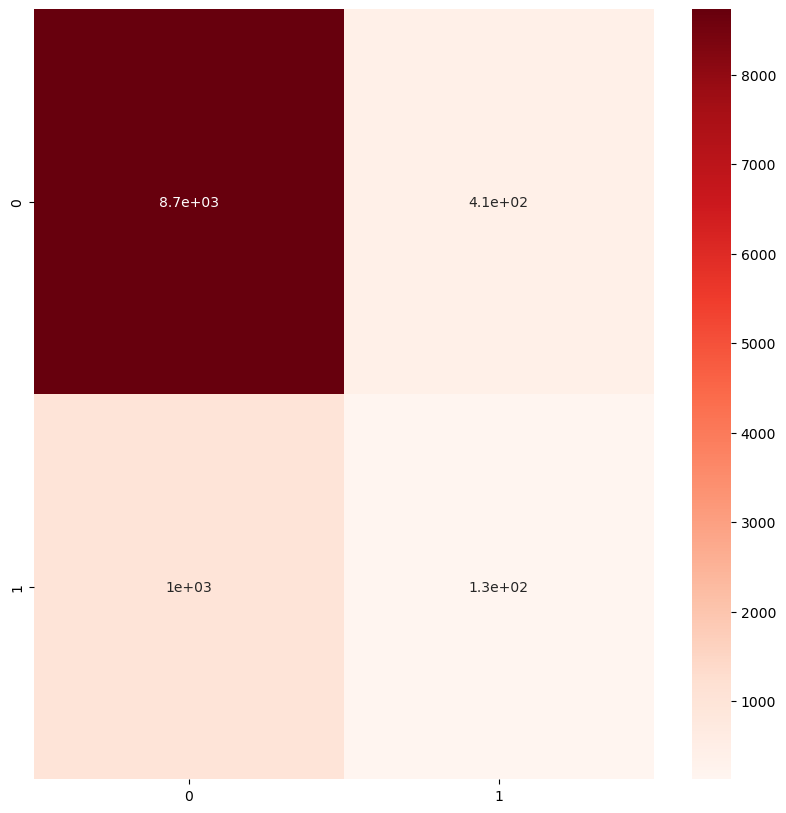

In [503]:
cfm_df=pd.DataFrame(cfm, range(2), range(2))
plt.figure(figsize=(10,10))
sns.heatmap(cfm_df, cmap='Reds', annot=True)
plt.show()

In [504]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8731,413,9144
1,1025,128,1153
All,9756,541,10297


## Score the Model

#### Precision Score
    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)

#### Recall Score
    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

#### F1 Score
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)

In [505]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.8900003237188825
F1 Score:- 0.32872382457526667
Average Precision Score:- 0.2119890328214029
Log Loss:- 3.9647902047916896
Precision Score:- 0.5282539682539683
Recall Score:- 0.23860051620303988
ROC-AUC Score:- 0.60574384297964


## A Simple model using Logistic Regression 

In [506]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

# instantiate the model
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)

In [518]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [519]:
# probability of getting output as 0 - no deposit

logreg.predict_proba(X_test)[:,0]

array([0.84129257, 0.91507102, 0.90948713, ..., 0.89435666, 0.90778129,
       0.96147706])

In [520]:
# probability of getting output as 1 - yes deposit

logreg.predict_proba(X_test)[:,1]

array([0.15870743, 0.08492898, 0.09051287, ..., 0.10564334, 0.09221871,
       0.03852294])

## Score the Model

In [521]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8871


In [522]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8871
Test set score: 0.8880


In [523]:
cfm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cfm)

Confusion matrix

 [[9144    0]
 [1153    0]]


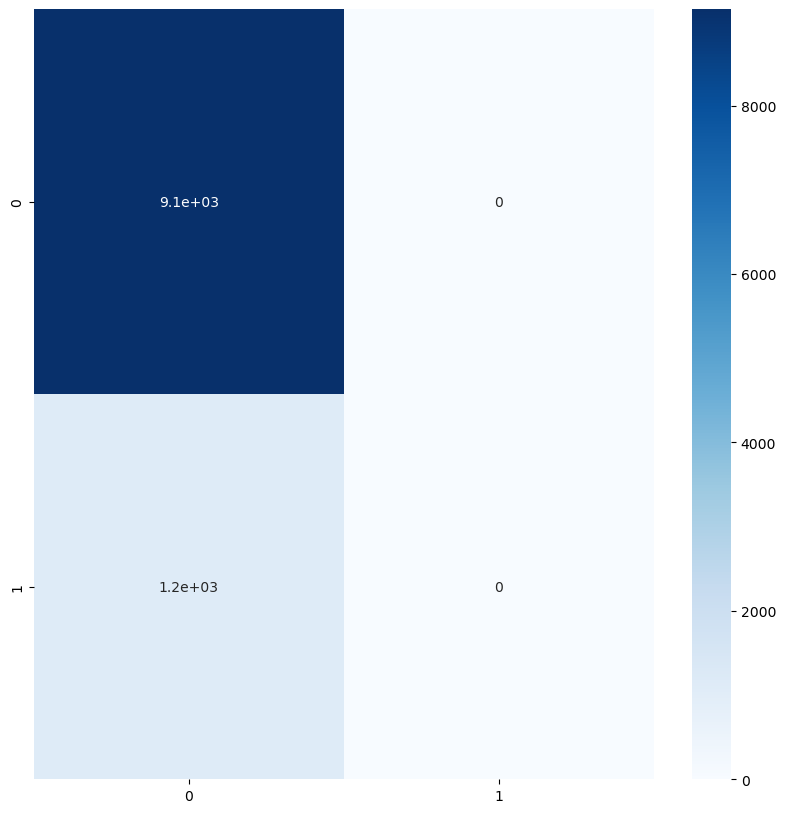

In [524]:
cfm_df=pd.DataFrame(cfm, range(2), range(2))
plt.figure(figsize=(10,10))
sns.heatmap(cfm_df, cmap='Blues', annot=True)
plt.show()

In [525]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9144
           1       0.00      0.00      0.00      1153

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.84     10297



/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree 

### Declare feature vector and target variable

In [574]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [576]:
dtree_1 = DecisionTreeClassifier(max_depth = 1).fit(X, y)
depth_1 = export_text(dtree_1, feature_names = list(X.columns))
print(depth_1)

|--- age <= 60.50
|   |--- class: 0
|--- age >  60.50
|   |--- class: 0



In [577]:
y_pred_depth_1 = dtree_1.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_depth_1)))

Model accuracy score with criterion gini index: 0.8880


In [578]:
dtree_100 = DecisionTreeClassifier(max_depth = 10).fit(X, y)
depth_100 = export_text(dtree_100, feature_names = list(X.columns))
print(depth_100)

|--- age <= 60.50
|   |--- default <= 0.50
|   |   |--- age <= 26.50
|   |   |   |--- job <= 7.50
|   |   |   |   |--- education <= 5.50
|   |   |   |   |   |--- job <= 0.50
|   |   |   |   |   |   |--- loan <= 1.50
|   |   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |   |   |   |--- education <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- education >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  23.50
|   |   |   |   |   |   |   |   |   |--- age <= 24.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  24.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |   |   |--- marital <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- marital > 

In [580]:
y_pred_depth_100 = dtree_100.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_depth_100)))

Model accuracy score with criterion gini index: 0.8945


In [581]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [582]:
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8877


In [583]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8874
Test set score: 0.8877


[Text(0.5, 0.875, 'x[0] <= 60.5\ngini = 0.2\nsamples = 30891\nvalue = [27404, 3487]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\ngini = 0.188\nsamples = 30197\nvalue = [27021, 3176]'),
 Text(0.125, 0.375, 'x[0] <= 26.5\ngini = 0.212\nsamples = 23833\nvalue = [20956, 2877]'),
 Text(0.0625, 0.125, 'gini = 0.34\nsamples = 1638\nvalue = [1282, 356]'),
 Text(0.1875, 0.125, 'gini = 0.201\nsamples = 22195\nvalue = [19674, 2521]'),
 Text(0.375, 0.375, 'x[0] <= 38.5\ngini = 0.09\nsamples = 6364\nvalue = [6065, 299]'),
 Text(0.3125, 0.125, 'gini = 0.119\nsamples = 2119\nvalue = [1984, 135]'),
 Text(0.4375, 0.125, 'gini = 0.074\nsamples = 4245\nvalue = [4081, 164]'),
 Text(0.75, 0.625, 'x[1] <= 5.5\ngini = 0.495\nsamples = 694\nvalue = [383, 311]'),
 Text(0.625, 0.375, 'x[1] <= 0.5\ngini = 0.497\nsamples = 634\nvalue = [340, 294]'),
 Text(0.5625, 0.125, 'gini = 0.484\nsamples = 39\nvalue = [16, 23]'),
 Text(0.6875, 0.125, 'gini = 0.496\nsamples = 595\nvalue = [324, 271]'),
 Text(0.875, 0.375, 'x[0] <= 69.

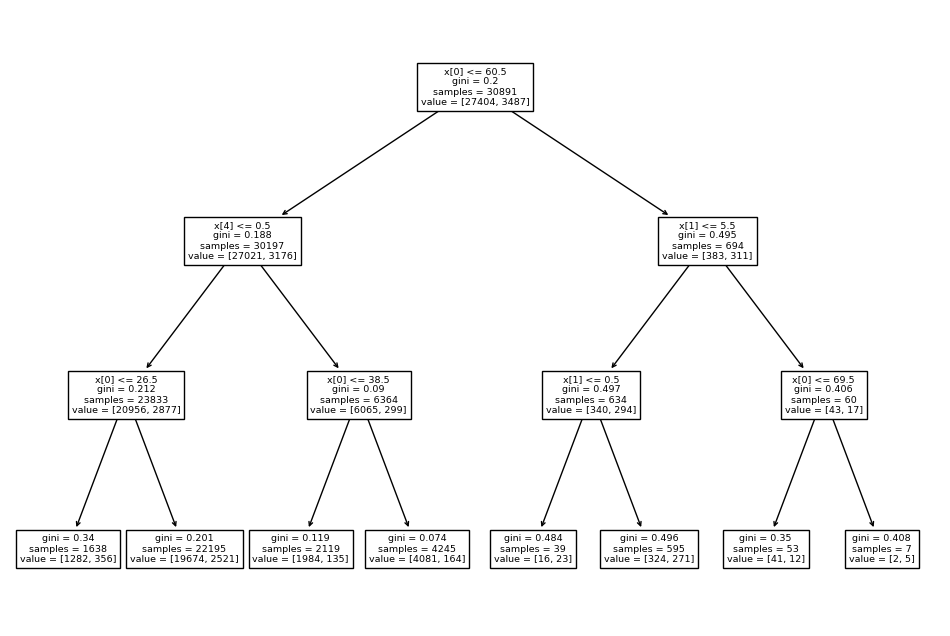

In [584]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [586]:
y_test_pred=dtree_100.predict(X_test)

cfm=confusion_matrix(y_test, y_test_pred)
trueNegative=cfm[0][0]
falsePossitive=cfm[0][1]
false_negative=cfm[1][0]
truePositive=cfm[1][1]

print("Confusion Matrix", cfm)

Confusion Matrix [[9130   14]
 [1072   81]]


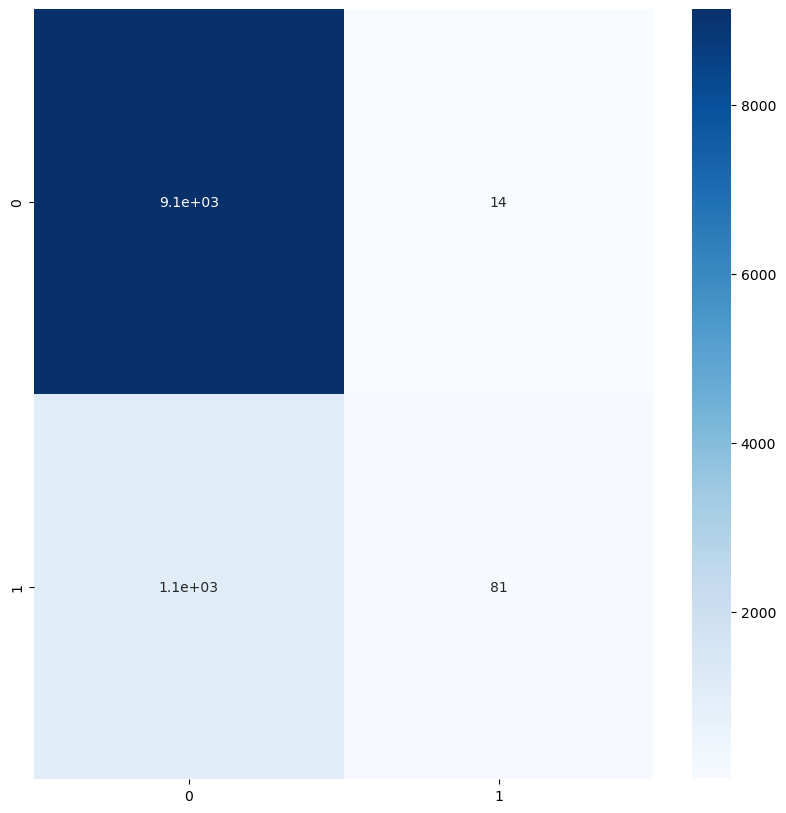

In [587]:
cfm_df=pd.DataFrame(cfm, range(2), range(2))
plt.figure(figsize=(10,10))
sns.heatmap(cfm_df, cmap='Blues', annot=True)
plt.show()

In [588]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.8900003237188825
F1 Score:- 0.32872382457526667
Average Precision Score:- 0.2119890328214029
Log Loss:- 3.9647902047916896
Precision Score:- 0.5282539682539683
Recall Score:- 0.23860051620303988
ROC-AUC Score:- 0.60574384297964


# Support Vector Machines 

Ref - https://www.kaggle.com/code/faressayah/support-vector-machine-pca-tutorial-for-beginner

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

<center>
    <img src = images/svm1.png width = 25%/>
</center>
<center>
    <img src = images/svm2.png width = 25%/>
</center>

In [591]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

In [593]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================


/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 88.72%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.887239     0.0  0.887239      0.443620      0.787194
recall         1.000000     0.0  0.887239      0.500000      0.887239
f1-score       0.940251     0.0  0.887239      0.470126      0.834228
support    25580.000000  3251.0  0.887239  28831.000000  28831.000000
_______________________________________________
Confusion Matrix: 
 [[25580     0]
 [ 3251     0]]



/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sridevi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 88.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.887594     0.0  0.887594      0.443797      0.787823
recall         1.000000     0.0  0.887594      0.500000      0.887594
f1-score       0.940450     0.0  0.887594      0.470225      0.834738
support    10968.000000  1389.0  0.887594  12357.000000  12357.000000
_______________________________________________
Confusion Matrix: 
 [[10968     0]
 [ 1389     0]]

=======================Polynomial Kernel SVM==========================


# Model Comparision 

Conclusion - All the models we have tried so far had an accuracy score ~89% 

Improving the Model

The following are the things we can do to improve the Models going forward, 

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric